# Assignment 1

I will explain the math and code of the secant method throughout this assignment. I will use the approach of firstly to explain the mathematics and then explain how I converted that into code. Then we will take a look at two different functions and discuss them.

I perfer to have all of my imports at the beggining. So for this assignment I have imported NumPy and MatPlotLib. NumPy is used to provide mathematical functions and MatPlotLib is used to create plots.

In [424]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1
The first part of the assignment is to implement the secant method. The secant method is a method for finding the real root of nonlinear equations. The reason why we would want to use the Secant method instead of Newton's Method is that you have to know the derivative of that function you are trying to find the root for. And in some cases that is quite complicated. And of course, you could use the bisection function, but that is a slower method. Secant method is therefore very useful. 
It uses a * secant * instead of a * tangent * line like Newton's method does. 

The Secant method requires two points initially, x0 and x1, and between these points, we get a secant line. The secant intersects the x-axis which will give us our x3 point, on the graph at that point at the x-axis. So the next step is now to draw a new secant line between x2 and x3. This will give us a new point x4, and so on. And we can keep on repeating this until we converge on another point. But while doing this there is a possibility of ending up dividing by zero. That will happen if the points we have don't intersect with the x-axis. Therefore we have to be careful when we pick the starting points. 

As we repeat getting new x-points we will always check if the points have reached a desired absolute accuracy or relative accuracy. 
The error is the difference between the real value and the one we find in our solution using our estimate. Since we don't know x* we use the estimate xi + 1 to estimate the error. 

So now that we know the mathematics behind it, we can take a look into how I converted it into a function. As the assignment specifies we had to take in a function * f *, the two starting points x0 and x1, and the relative accuracy *eps_r* and the absolute accuracy *eps_a*. The assignment also specifies that the secant function should return a full list of x-values and the number of iterations that were done. I, therefore, start by defining the empty array * listOfX *. Since we don't know how many iterations we would have to do I chose to use a while-loop. Since there is nothing that should be done outside of the while-loop I started an infinite loop by giving it the condition to run as True. Wich will always be true because it will never be changed. The loop would only be stopped if the function returned something. 

Inside the while-loop, we start by running the actual secant equation. The value x will be set to the new "x3" value "x4" value and so on, as explained over. We add the x value we get from the equation to our list by using * append *. Then we check if we meet the condition that our calculations of the accuracy are smaller than our predefined requirement. If the condition is true it means that we have the root, or at least a number very close to the root. How close we get depends on what we decide *eps_r* and *eps_a* to be when we call the function. When we get inside the if-sentence we will stop the while-loop by returning *listOfX* and the length of *listOfX*. I can use the length of the list instead of a counter because I will always add one element to the array for each iteration.

If our new values don't meet the requirements in the first if-sentence we move on the next. In the next if-sentence, we check that x is still a number. X will not be a number if we tried to divide by zero in the secant equation. If this has happened x will be of type *NaN*, which stands for Not a Number, and we return a string which tells you to use other start values to avoid that problem. 

At the end of the while-loop, I set x0 equal x1 and x1 equal x. This is because we always want to use xi - 1 and xi in our calculations. This means that we want to use the newest values so that we can get closer and closer to the root. Since we are about to start a new iteration x0 will no longer be used because it is now xi-2. x1 is now the xi-1 and x is the new xi. 
The same procedure that is inside the while-loop will then repeat itself until one of the if-sentence conditions are true.

In [425]:
def secant(f, x0, x1, eps_r, eps_a):
    listOfX = []
    while True:
        x = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
        listOfX.append(x)
        if abs(x1 - x) < eps_a or abs((x1 - x)/x) < eps_r:
            return listOfX, len(listOfX)
        if x != x:
            return 'The secant line does not intersect with the x-axis, try to use other start values.'
        x0 = x1
        x1 = x


## Part 2
For the next part of the assignment, I studied the convergence of an algorithm where we have the hyperbolic tangent of x-1. I started off by creating a function that has x as an input and returns the calculated answer of the algorithm.

In [426]:
def tanh_f(x):
    return np.tanh(x - 1)

To plot the function I used MatPlotLib's function plot, which I gave x values to by using NumPy's function arange. Arange gives in this case all numbers between -2 and 5 with intervals of 0.1. The y value in the plot is the *tanh_f* with the same input values as given to x so that the graph is in the same dimension as the x-axis. In jupyter the command *plt.show()* is not necessary because all plots are shown, but since I normally use another code editor this is a habit I will continue with.

As well as plotting the function I used my secant function with the accuracy at 0.0001, x0 as 0, and I chose, in this case, x1 to be 3.98. The reason why I have chosen 3.98 for x1 is that I can see in the graph that I have to have to start with x1 bigger than around -1.3 and smaller than circa 3.9. After trying out some values in my secant function I found out that the exact values where the function does not converge anymore are -1.33 and 3.98. That is because we end up dividing by zero in our secant equation. As explained previously we end up with a secant that does not intersect the x-axis. But as long as I chose x1 to be a number in between -1.33 and 3.98 we will find the root, which is 1.

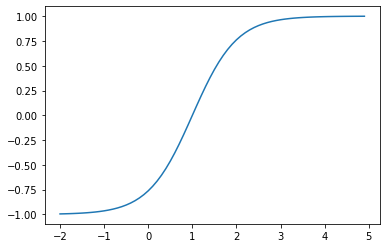

[1.7257245385822526, -2.009875249565276, 0.29112790862503823, 3.934964142246129, 1.6765131939689781, -1.6083939754576422, 0.45023669076991046, 2.5571952614061066, 1.1950934738531975, 0.8317917715453276, 1.0002896356850872, 0.9999972782261857, 1.0000000000000755] 13


In [427]:
plt.plot(np.arange(-2, 5, 0.1), tanh_f(np.arange(-2, 5, 0.1)))
plt.show()
listOfX, counter = secant(tanh_f, 0, 3.98, 0.0001, 0.0001)
print(listOfX, counter)

I did also make a plot out of the x value from each iteration in the secant function. This solves nothing, but I thought it was interesting to see how the value moved back and forth with big gaps and after more iterations, you could see that the x value gaps were smaller and it stabilized on the root, 1.

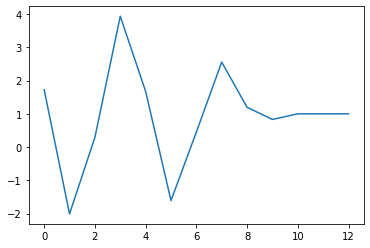

In [453]:
plt.plot(np.arange(0, len(listOfX), 1), listOfX)
plt.show()

## Part 3
For the last part of the assignment I created the function * polynom_f * that takes x as an input and returns the third degree polynomial where I defined *a* as 0.0001.

In [429]:
def polynom_f(x):
    a = 0.0001
    return x ** 3 + (0.1 * x**2) + a * x
    

I like to have a certain idea of how the graph will look before I continue. Therefore I plotted the graph with the x values from -3 to 10 with intervals of 0.1.

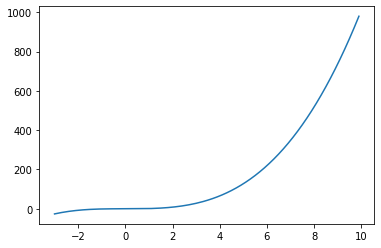

In [430]:
plt.plot(np.arange(-3, 10, 0.1), polynom_f(np.arange(-3, 10, 0.1)))
plt.show()

In this part, we will also look at the third degree polynomial with different a's. Instead of creating a generic function to do that I created three more functions with different *a* values because this is more readable.

In [431]:
def polynom_f_1(x):
    return x ** 3 + (0.1 * x**2) + 0.1 * x

def polynom_f_2(x):
    return x ** 3 + (0.1 * x**2) + 0.01 * x

def polynom_f_3(x):
    return x ** 3 + (0.1 * x**2) + 0.001 * x

In the next plot, I have plotted the logarithm of the x values (which is already the absolute value), from the secant method with all of the different *a* values so that we can see what differences it makes, instead of only plotting the one where *a=0.0001*, as asked in the assignment. I did also add some labels. 

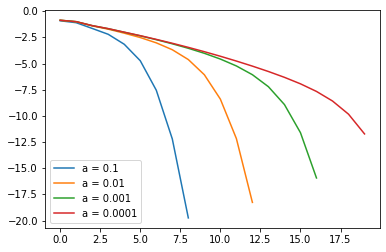

[0.4, 0.33333333333333337, 0.19230769230769237, 0.10994953136265326, 0.04243334870335959, 0.008800882125240356, 0.0005259939692850331, 5.010116550382905e-06, 2.6478711675756154e-09]


In [446]:
val, count = secant(polynom_f, 0.5, 1, 0.0001, 0.0001)
val1, count1 = secant(polynom_f_1, 0.5, 1, 0.0001, 0.0001)
val2, count2 = secant(polynom_f_2, 0.5, 1, 0.0001, 0.0001)
val3, count3 = secant(polynom_f_3, 0.5, 1, 0.0001, 0.0001)

plt.plot(np.arange(0, len(val1), 1), np.log(val1), label="a = 0.1")
plt.plot(np.arange(0, len(val2), 1), np.log(val2), label="a = 0.01")
plt.plot(np.arange(0, len(val3), 1), np.log(val3), label="a = 0.001")
plt.plot(np.arange(0, len(val), 1), np.log(val), label ="a = 0.0001")
plt.legend(loc="lower left")
plt.show()

print(val)

A superlinear function is a function that grows faster than a linear one. But we can see that the convergence is superlinear here because the graph above is not linear but increases the speed downwards gradually. There is also the formula: $$ |Xi+1 - X*| / |Xi -X*|  -> 0 $$ Which tells us that when we put in our estimate Xi for X* we will get closer to zero. If we look at the print statement above we can see that the x values from the secant method are getting closer and closer to zero, which is also a way to show that the convergence is superlinear. 


If we compare the convergence with the different *a* values we can, first of all, see that the smaller *a* was, the more iterations needed to find the root, as you can see in the print statement below. We can also see that the last x-value, which is the root, is closer to zero the bigger *a* is. 

In [449]:
print('a = 0.1:', val1, 'iterations:', count1)
print('a = 0.01:', val2, 'iterations:', count2)
print('a = 0.001:', val3, 'iterations:', count3)
print('a = 0.0001:', val, 'iterations:', count)

a = 0.1: [0.4, 0.33333333333333337, 0.19230769230769237, 0.10994953136265326, 0.04243334870335959, 0.008800882125240356, 0.0005259939692850331, 5.010116550382905e-06, 2.6478711675756154e-09] iterations: 9
a = 0.01: [0.418848167539267, 0.36432188610985133, 0.24544440396819883, 0.17960694208147443, 0.12240773585694609, 0.08076835679784042, 0.048571244035588525, 0.025173810220117873, 0.009839786440831642, 0.0023096989009502075, 0.00022476657135173193, 5.188443301124723e-06, 1.1661825945886923e-08] iterations: 13
a = 0.001: [0.4208311415044713, 0.36760958510942615, 0.2513677221401791, 0.18787457104869582, 0.13358715505086294, 0.09496411316429018, 0.06573627171456256, 0.04440253905809115, 0.028897451952748607, 0.017904097246104096, 0.010329249555138286, 0.005346598455639972, 0.002316223655680178, 0.0007355593825306695, 0.00013373933415456005, 9.12371726611975e-06, 1.2047091268146627e-07] iterations: 17
a = 0.0001: [0.4210304720804168, 0.36794031159006974, 0.2519661607037773, 0.1887131414670

## Golden Ratio
As an extra part, I knew that the secant methods order would be around 1.61. which is the golden ratio. I wanted to test that, and as you can see in the result we have numbers around 1.61 but not exactly, most likely because we use estimations and there will be some inaccuracy.
 
a = 0.000001 gir 1.0028537544478202 

a = 0.0001 gir 1.476234890711224 

a = 0.001 gir 1.6686402254714854 

a = 0.01 gir 1.6649866408853549

a = 0.1 gir 1.679692241239672

If we used Newton's method the number here should have been 2, and if we were to use the Bisection method it should have been 1.


In [450]:
def log(e3, e2, e1):
    upper = np.log(e3/e2)
    lower = np.log(e2/e1)
    return upper/lower

print(log((abs(8.091536957433603e-06 - 5.337184729255087e-05)), (abs(5.337184729255087e-05 - 0.00018778850020340082)), (abs(0.00018778850020340082 - 0.0004686897569829315))))

1.476234890711224


## Conclusion

Throughout this assignment, I have explained how the secant method works and how I implemented it. I have taken a closer look at the convergence of two different functions and discussed the plots and results from the secant method. Throughout this assignment, I have gotten a more advanced knowledge of why numerical solutions are useful.